<img src='https://github.com/Rogerio-mack/work/blob/main/figuras/logo_sbc.png?raw=true' width=250, align="right">

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Case: JetRail**

Este é um cenário fictício de dados. Uma empresa de tecnologia erroviária, **JetRail**, desenvolveu uma tecnologia de propulsão para trens mais rápidos. O O investimento nessa tecnologia, entretant,  só parece viável houver um mínimo de um milhão de passageiros para os próximos dezoito meses. É necessário, então,avaliarmos a previsão do número de passageiros.

In [138]:
df = pd.read_csv('https://github.com/Introducao-Series-Temporais-em-Python/minicurso-SBC-SBSI-2024/raw/main/data/Train%20data.csv')

df.index = pd.to_datetime(df['Datetime'],dayfirst=True) # or ,format='%d-%m-%Y %H:%M')
df = df.drop(columns=['ID','Datetime'])
display(df.head())
print()
df.shape

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


(18288, 1)

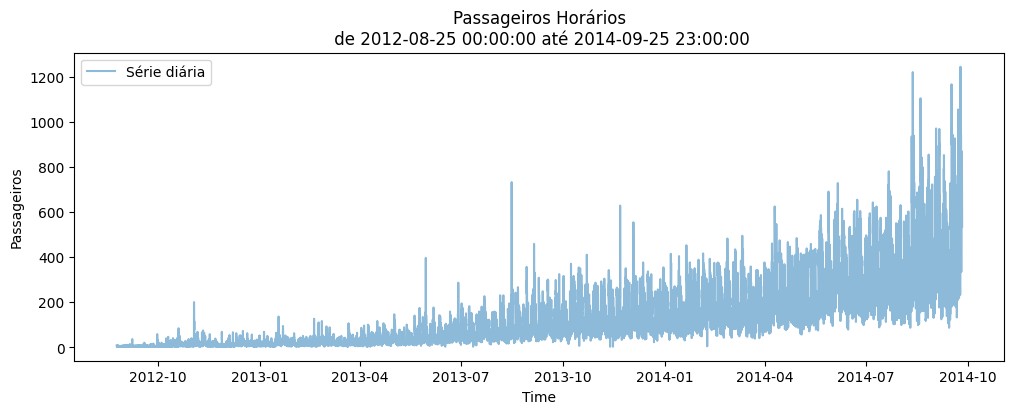

In [139]:
plt.figure(figsize=(12, 4))

plt.plot(df.index,df.Count,label='Série diária',alpha=0.5)
plt.title ('Passageiros Horários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()


# Ex1.

Empregue a função `rolling` (pacote `pandas`) e faça um gráfico de como variam os valores médios e desvio padrão da série ao longo do dia (janela de 24h).

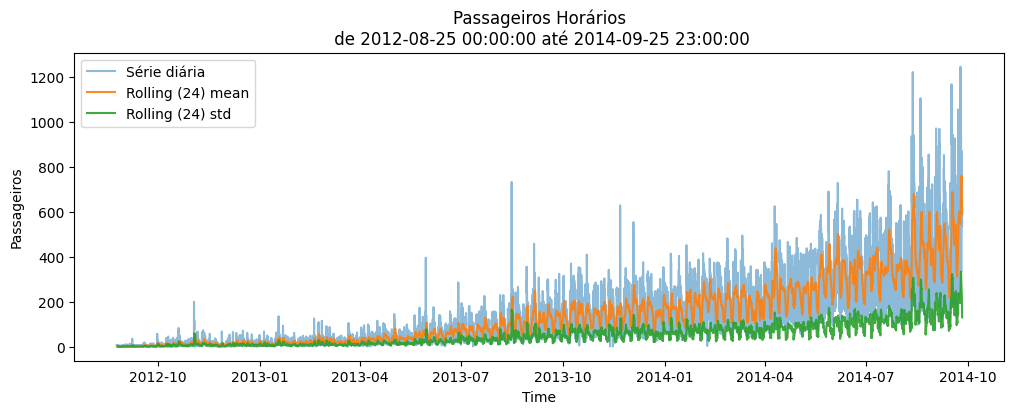

In [140]:
plt.figure(figsize=(12, 4))

plt.plot(df.index,df.Count,label='Série diária',alpha=0.5)
plt.plot(df.rolling(24).mean().index,df.Count.rolling(24).mean(),label='Rolling (24) mean',alpha=0.9)
plt.plot(df.rolling(24).std().index,df.Count.rolling(24).std(),label='Rolling (24) std',alpha=0.9)

plt.title ('Passageiros Horários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()

# Ex2.

Faça os testes Augmented Dickey-Fuller (ADF) e Kwiatkowski–Phillips–Schmidt–Shin (KPSS) da série e verifique a estacionariedade.

In [141]:
from statsmodels.tsa.stattools import adfuller, kpss

ADF_pvalue = adfuller(df.Count.dropna())[1]
print('Série Original, ADF p-value = ' + str(np.round(ADF_pvalue,6)))

KPSS_pvalue = kpss(df.Count.dropna())[1]
print('Série Original, KPSS p-value = ' + str(np.round(KPSS_pvalue,6)))


Série Original, ADF p-value = 0.000235
Série Original, KPSS p-value = 0.01


<ipython-input-141-87263cdedaf1>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_pvalue = kpss(df.Count.dropna())[1]


# Ex3.

Apesar dos testes Augmented Dickey-Fuller (ADF) e Kwiatkowski–Phillips–Schmidt–Shin (KPSS) da série validarem a série como  estacionária, é clara uma tendência de crescimento dos dados.

Vamos, então, fazer as seguintes transformações a fim de obtermos uma série mais estacionária:

* Resample da série para média dos valores diários
* Transformar a série para o log de seus valores

Verifique que a série do log não é estacionária, mas a de diferenças do log sim.

Faça a seguir o gráfico da nova série obtida com a variação da média e desvio padrão de 30 dias, e verifique os testes de estacionariedade.

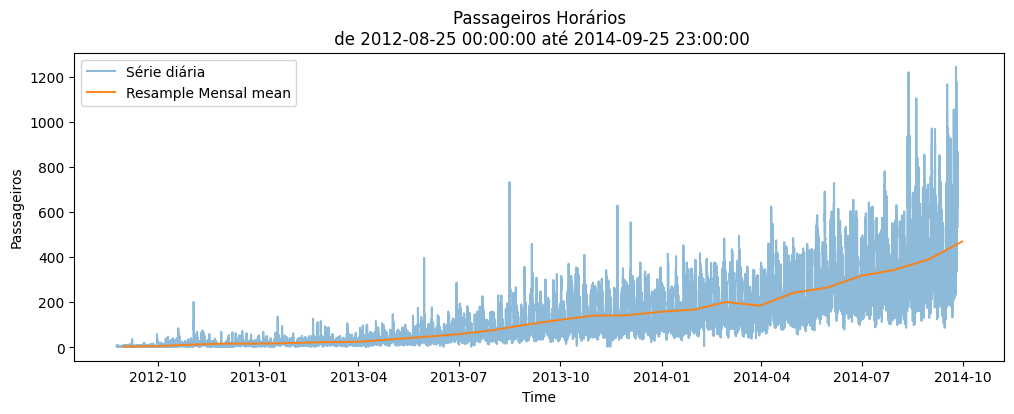

In [142]:
plt.figure(figsize=(12, 4))

plt.plot(df.index,df.Count,label='Série diária',alpha=0.5)
plt.plot(df.resample('M').mean().index,df.Count.resample('M').mean(),label='Resample Mensal mean',alpha=0.9)

plt.title ('Passageiros Horários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()

In [143]:
df = df.resample('D').mean()
df.Count = np.log(df.Count)
df_diff = df[['Count']].diff(1).dropna()


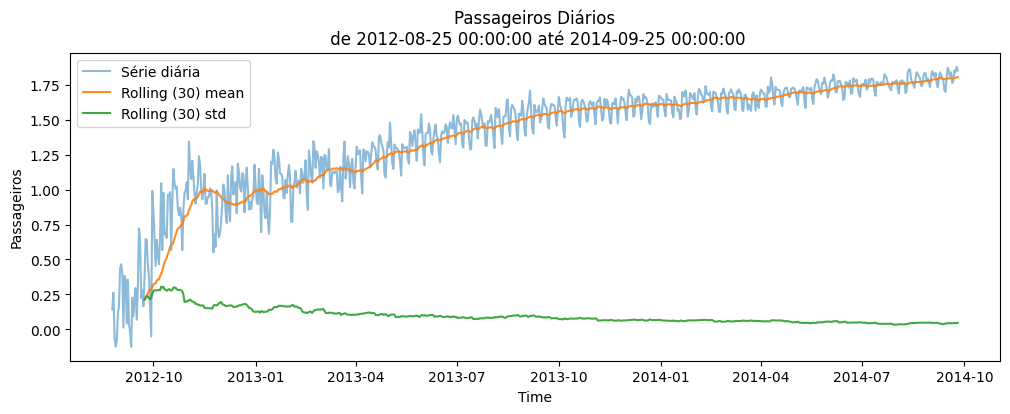

In [123]:
plt.figure(figsize=(12, 4))

plt.plot(df.index,df.Count,label='Série diária',alpha=0.5)
plt.plot(df.rolling(30).mean().index,df.Count.rolling(30).mean(),label='Rolling (30) mean',alpha=0.9)
plt.plot(df.rolling(30).std().index,df.Count.rolling(30).std(),label='Rolling (30) std',alpha=0.9)

plt.title ('Passageiros Diários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()



In [144]:
from statsmodels.tsa.stattools import adfuller, kpss

ADF_pvalue = adfuller(df.Count.dropna())[1]
print('Série Log, ADF p-value = ' + str(np.round(ADF_pvalue,6)))

KPSS_pvalue = kpss(df.Count.dropna())[1]
print('Série Log, KPSS p-value = ' + str(np.round(KPSS_pvalue,6)))

ADF_pvalue = adfuller(df_diff.Count.dropna())[1]
print('Série Log diff, ADF p-value = ' + str(np.round(ADF_pvalue,6)))

KPSS_pvalue = kpss(df_diff.Count.dropna())[1]
print('Série Log diff, KPSS p-value = ' + str(np.round(KPSS_pvalue,6)))


Série Log, ADF p-value = 0.138019
Série Log, KPSS p-value = 0.01
Série Log diff, ADF p-value = 0.0
Série Log diff, KPSS p-value = 0.1


<ipython-input-144-bb0a0aa3ac9f>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  KPSS_pvalue = kpss(df.Count.dropna())[1]
<ipython-input-144-bb0a0aa3ac9f>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  KPSS_pvalue = kpss(df_diff.Count.dropna())[1]


# Ex4.

Gere e analise os gráficos ACF e PACF sobre a série do log dos valores. Em seguida faça um modelo ARIMA(2,1,2) e compare graficamente os resultados com a série de log original. Faça a mesma comparação para os dados originais (aplique `np.exp()`).

In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_ts_acf_pacf(ts,model_name):
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,3.5))

  ax1.plot(ts,linestyle='solid',alpha=1,lw=1)
  ax1.title.set_text('Série ' + model_name)
  plot_acf(ts, ax=ax2, title='ACF ' + model_name)
  y=plot_pacf(ts, ax=ax3, title='PACF ' + model_name)

  plt.tight_layout()
  plt.show()
  return

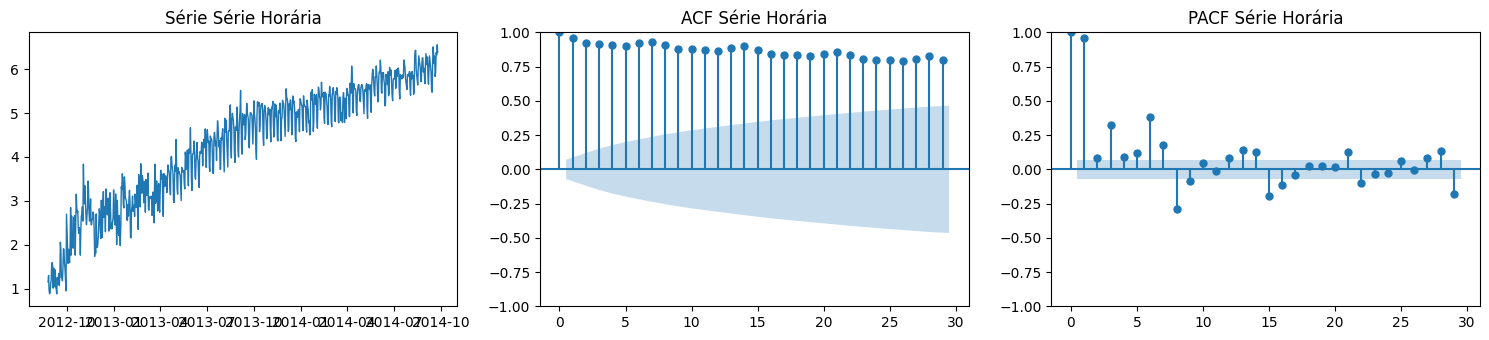

In [146]:
plot_ts_acf_pacf(df,'Série Diária')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


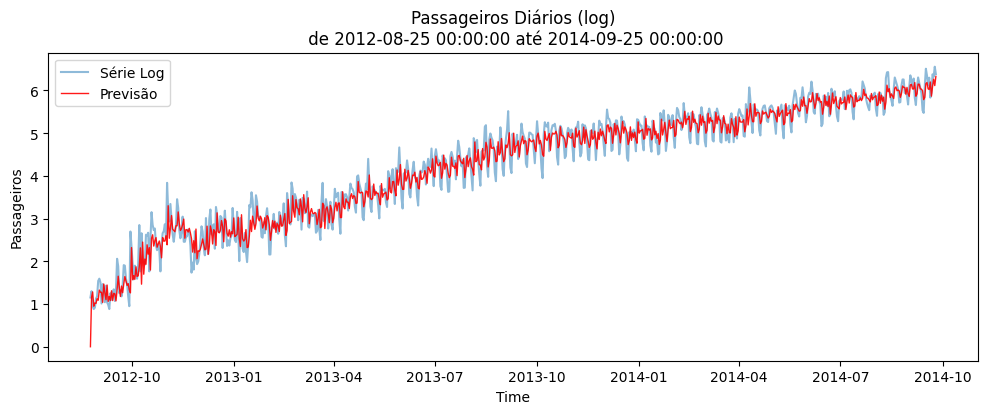

In [151]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(12, 4))

model = ARIMA(df, order=(2, 1, 2))
results_ARIMA = model.fit()

plt.plot(df, label='Série Log',alpha=0.5)
plt.plot(results_ARIMA.fittedvalues, color='r', label='Previsão', alpha=0.9, lw=1)
plt.title ('Passageiros Diários (log)\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()

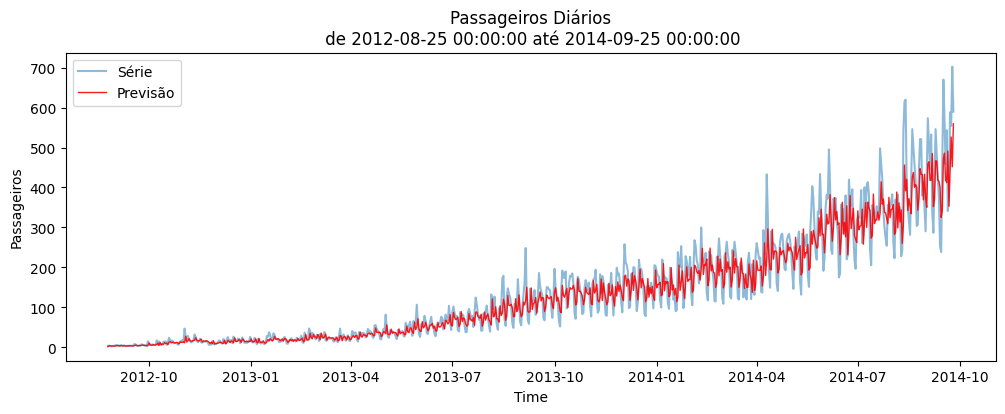

In [157]:
plt.figure(figsize=(12, 4))

plt.plot(np.exp(df.Count), label='Série',alpha=0.5)
plt.plot(np.exp(results_ARIMA.fittedvalues), color='r', label='Previsão', alpha=0.9, lw=1)
plt.title ('Passageiros Diários\n de ' + str(df.index.min()) + ' até ' + str(df.index.max()))
plt.xlabel('Time')
plt.ylabel ('Passageiros')
plt.legend()

plt.show()